# Instalação e Importação dos recursos necessários

In [1]:
pip install unidecode

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Separando cada aba do arquivo xls em um arquivo csv separado

In [3]:
# Carregar o arquivo Excel
xls = pd.ExcelFile("datasets/Tabela 2623.xlsx")

# Iterar sobre cada aba/sheet no arquivo Excel
for sheet_name in xls.sheet_names:
    # Carregar a sheet em um DataFrame
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Salvar o DataFrame em um arquivo CSV
    df.to_csv(f'{sheet_name}.csv', index=False)

print("Cada aba foi salva como um arquivo CSV separado.")

Cada aba foi salva como um arquivo CSV separado.


# Tratando os dados

## Agência de Notícias

In [4]:
agencias_de_noticias_df = pd.read_csv("datasets/agencias_de_noticias.csv", skiprows=4)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
agencias_de_noticias_df.shape

(16, 51)

### Ajeitando o nome das colunas

In [5]:
agencias_de_noticias_df.columns

Index(['Unnamed: 0', 'Receita operacional líquida (Mil Reais)',
       'Coeficiente de variação - Receita operacional líquida (%)',
       'Custo das mercadorias revendidas (Mil Reais)',
       'Coeficiente de variação - Custo das mercadorias revendidas (%)',
       'Subvenções e outras receitas operacionais (Mil Reais)',
       'Coeficiente de variação - Subvenções e outras receitas operacionais (%)',
       'Valor bruto da produção (Mil Reais)',
       'Coeficiente de variação - Valor bruto da produção (%)',
       'Consumo intermediário - total (Mil Reais)',
       'Coeficiente de variação - Consumo intermediário - total (%)',
       'Consumo intermediário - mercadorias, materiais de consumo e de reposição (Mil Reais)',
       'Coeficiente de variação - Consumo intermediário - mercadorias, materiais de consumo e de reposição (%)',
       'Consumo intermediário - combustíveis e lubrificantes (Mil Reais)',
       'Coeficiente de variação - Consumo intermediário - combustíveis e lubrif

In [6]:
import re

# Função para remover acentos sem usar unidecode
def remove_accents(input_str):
    accents = {
        'a': 'áàâãäå',
        'e': 'éèêë',
        'i': 'íìîï',
        'o': 'óòôõö',
        'u': 'úùûü',
        'c': 'ç',
        'n': 'ñ'
    }
    for char, accented_chars in accents.items():
        for accented_char in accented_chars:
            input_str = input_str.replace(accented_char, char)
            input_str = input_str.replace(accented_char.upper(), char.upper())
    return input_str

# Lista original
lista = [
    "ano",
    'Receita operacional líquida',
    'Coeficiente de variação - Receita operacional líquida (%)',
    'Custo das mercadorias revendidas (Mil Reais)',
    'Coeficiente de variação - Custo das mercadorias revendidas (%)',
    'Subvenções e outras receitas operacionais (Mil Reais)',
    'Coeficiente de variação - Subvenções e outras receitas operacionais (%)',
    'Valor bruto da produção',
    'Coeficiente de variação - Valor bruto da produção (%)',
    'Consumo intermediário - total ',
    'Coeficiente de variação - Consumo intermediário - total (%)',
    'Consumo intermediário - mercadorias, materiais de consumo e de reposição',
    'Coeficiente de variação - Consumo intermediário - mercadorias, materiais de consumo e de reposição (%)',
    'Consumo intermediário - combustíveis e lubrificantes',
    'Coeficiente de variação - Consumo intermediário - combustíveis e lubrificantes (%)',
    'Consumo intermediário - serviços prestados por terceiros',
    'Coeficiente de variação - Consumo intermediário - serviços prestados por terceiros (%)',
    'Consumo intermediário - aluguéis de imóveis, veículos, máquinas e equipamentos',
    'Coeficiente de variação - Consumo intermediário - aluguéis de imóveis, veículos, máquinas e equipamentos (%)',
    'Consumo intermediário - prêmios de seguros',
    'Coeficiente de variação - Consumo intermediário - prêmios de seguros (%)',
    'Consumo intermediário - serviços de comunicação',
    'Coeficiente de variação - Consumo intermediário - serviços de comunicação (%)',
    'Consumo intermediário - energia elétrica, gás, água e esgoto',
    'Coeficiente de variação - Consumo intermediário - energia elétrica, gás, água e esgoto (%)',
    'Consumo intermediário - outros custos e despesas operacionais',
    'Coeficiente de variação - Consumo intermediário - outros custos e despesas operacionais (%)',
    'Valor adicionado bruto a preços básicos',
    'Coeficiente de variação - Valor adicionado bruto a preços básicos (%)',
    'Gastos com pessoal - total',
    'Coeficiente de variação - Gastos com pessoal - total (%)',
    'Gastos com pessoal - salários, retiradas e outras remunerações',
    'Coeficiente de variação - Salários, retiradas e outras remunerações (%)',
    'Gastos com pessoal - contribuições para a previdência social',
    'Coeficiente de variação - Gastos com pessoal - contribuições para a previdência social (%)',
    'Gastos com pessoal - FGTS',
    'Coeficiente de variação - Gastos com pessoal - FGTS (%)',
    'Gastos com pessoal - contribuições para a previdência privada',
    'Coeficiente de variação - Gastos com pessoal - contribuições para a previdência privada (%)',
    'Gastos com pessoal - indenizações trabalhistas',
    'Coeficiente de variação - Gastos com pessoal - indenizações trabalhistas (%)',
    'Gastos com pessoal - benefícios concedidos aos empregados)',
    'Coeficiente de variação - Gastos com pessoal - benefícios concedidos aos empregados (%)',
    'PIS sobre folha de pagamento',
    'Coeficiente de variação - PIS sobre folha de pagamento (%)',
    'Excedente operacional bruto',
    'Coeficiente de variação - Excedente operacional bruto (%)',
    'Pessoal ocupado em 31/12 (Pessoas)',
    'Coeficiente de variação - Pessoal ocupado em 31/12 (%)',
    'Número de empresas (Unidades)',
    'Coeficiente de variação - Número de empresas (%)'
]

# Função para normalizar cada string
def normalize_string(s):
    # Remove acentos
    s = remove_accents(s)
    # Converte para minúsculas
    s = s.lower()
    # Remove caracteres especiais, mantendo espaços e números
    s = re.sub(r'[^a-z0-9\s/]', '', s)
    # Remove espaços extras
    s = re.sub(r'\s+', ' ', s).strip()
    # Substitui espaços e "/" por "_"
    s = s.replace(' ', '_').replace('/', '_')
    return s

# Aplica a função a todos os itens da lista
lista_normalizada = [normalize_string(item) for item in lista]

# Imprime a lista normalizada
print(lista_normalizada)

['ano', 'receita_operacional_liquida', 'coeficiente_de_variacao_receita_operacional_liquida', 'custo_das_mercadorias_revendidas_mil_reais', 'coeficiente_de_variacao_custo_das_mercadorias_revendidas', 'subvencoes_e_outras_receitas_operacionais_mil_reais', 'coeficiente_de_variacao_subvencoes_e_outras_receitas_operacionais', 'valor_bruto_da_producao', 'coeficiente_de_variacao_valor_bruto_da_producao', 'consumo_intermediario_total', 'coeficiente_de_variacao_consumo_intermediario_total', 'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao', 'coeficiente_de_variacao_consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao', 'consumo_intermediario_combustiveis_e_lubrificantes', 'coeficiente_de_variacao_consumo_intermediario_combustiveis_e_lubrificantes', 'consumo_intermediario_servicos_prestados_por_terceiros', 'coeficiente_de_variacao_consumo_intermediario_servicos_prestados_por_terceiros', 'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipam

In [7]:
agencias_de_noticias_df.columns = lista_normalizada
agencias_de_noticias_df.columns

Index(['ano', 'receita_operacional_liquida',
       'coeficiente_de_variacao_receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'coeficiente_de_variacao_custo_das_mercadorias_revendidas',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'coeficiente_de_variacao_subvencoes_e_outras_receitas_operacionais',
       'valor_bruto_da_producao',
       'coeficiente_de_variacao_valor_bruto_da_producao',
       'consumo_intermediario_total',
       'coeficiente_de_variacao_consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'coeficiente_de_variacao_consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'coeficiente_de_variacao_consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'coeficiente_de_variacao_consumo_intermed

### Removendo colunas de coeficiente de variação

In [8]:
colunas_selecionadas = [col for col in agencias_de_noticias_df.columns if "coeficiente" not in col]
agencias_de_noticias_df = agencias_de_noticias_df[colunas_selecionadas]
agencias_de_noticias_df.columns

Index(['ano', 'receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'valor_bruto_da_producao', 'consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais',
       'valor_adicionado_bruto_a_precos_basicos', 'gastos_com_pessoal_total',
       'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos_com_pess

### Removendo footer

In [9]:
agencias_de_noticias_df = agencias_de_noticias_df.iloc[:-1, :]
agencias_de_noticias_df.shape

(15, 26)

### Ajustando os tipos dos dados

In [10]:
agencias_de_noticias_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     object 
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     object 
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

### Ajustando datas

In [11]:
agencias_de_noticias_df['ano'] = pd.to_datetime(agencias_de_noticias_df["ano"])
agencias_de_noticias_df['ano'] = agencias_de_noticias_df["ano"].dt.year
agencias_de_noticias_df["ano"]

0     2007
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
12    2019
13    2020
14    2021
Name: ano, dtype: int32

### Ajustando colunas numericas

In [12]:
agencias_de_noticias_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,397811.00,-,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,105360.00,20413.00,7912.00,730.00,2180.00,9103.00,...,137424.00,5202.00,1430.00
1,2008,421744.00,232,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,107650.00,20133.00,8063.00,926.00,2830.00,10195.00,2,139649.00,5109.00,1347.00
2,2009,542945.00,-,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,149352.00,23419.00,11092.00,2090.00,4694.00,14007.00,13,181530.00,7477.00,1653.00
3,2010,686085.00,580,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,200514.00,27394.00,12433.00,649.00,7623.00,15816.00,11,214166.00,9813.00,2581.00
4,2011,1189552.00,4766,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,267346.00,38409.00,16381.00,1741.00,5920.00,26819.00,-,552752.00,13913.00,3511.00


#### Lidando com valores ausentes

In [13]:
colunas_numericas = [col for col in agencias_de_noticias_df.columns if "ano" not in col]
agencias_de_noticias_df[colunas_numericas].describe()

,receita_operacional_liquida,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,consumo_intermediario_premios_de_seguros,consumo_intermediario_servicos_de_comunicacao,...,gastos_com_pessoal_total,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,...,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,1421811.13,7457.07,1418390.87,395392.13,76577.60,5995.00,119604.73,38274.53,1528.33,23562.53,...,490165.40,362492.60,45024.93,23645.20,3260.73,10922.20,44805.07,532833.67,13990.53,3953.60
std,628047.93,5432.38,622190.30,189363.77,35186.75,4204.74,65131.43,27824.98,1322.12,11566.97,...,213214.12,157973.78,15204.10,10033.63,1950.90,5370.61,25511.99,243727.99,5004.71,1585.19
min,397811.00,744.00,399186.00,116064.00,25002.00,1034.00,32803.00,10536.00,230.00,10822.00,...,145698.00,105360.00,20133.00,7912.00,649.00,2180.00,9103.00,137424.00,5109.00,1347.00
25%,937818.50,3879.00,939024.50,245037.50,53473.50,1505.50,58849.00,18980.00,641.00,16013.50,...,310528.00,233930.00,32901.50,14407.00,1738.00,6771.50,21317.50,383459.00,11598.00,3046.00
50%,1629763.00,5383.00,1630683.00,442568.00,72301.00,6953.00,99766.00,39525.00,1097.00,22223.00,...,603318.00,449638.00,50308.00,26304.00,2810.00,11030.00,51892.00,621245.00,14363.00,4239.00
75%,1854662.00,10464.50,1859859.50,468175.50,94992.00,8200.50,160987.00,43244.00,1806.00,27033.50,...,648965.50,478141.00,55574.00,31038.50,4682.00,15532.50,62345.00,651093.50,18391.00,5296.00
max,2193653.00,18008.00,2179515.00,745606.00,168264.00,12862.00,232031.00,123467.00,5009.00,48466.00,...,778379.00,579988.00,66635.00,35407.00,6297.00,17783.00,86308.00,867775.00,20042.00,6114.00


In [14]:
agencias_de_noticias_df[agencias_de_noticias_df.isin(["-", "..."])] = np.nan
agencias_de_noticias_df[colunas_numericas].apply(pd.to_numeric)
agencias_de_noticias_df[colunas_numericas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 25 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   receita_operacional_liquida                                                 15 non-null     float64
 1   custo_das_mercadorias_revendidas_mil_reais                                  13 non-null     object 
 2   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 3   valor_bruto_da_producao                                                     15 non-null     float64
 4   consumo_intermediario_total                                                 15 non-null     float64
 5   consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao       15 non-null     float64
 6   consumo_intermediario_combustiveis_e_lubrificantes  

#### Tratando outliers

##### Disclaimer: Nem todos os outliers são removidos, e eu não sei identificar o motivo ou como corrigir com o que eu aprendi até o momento. 
##### Isso vale para todo df que após a chamada da função replace_outliers_by_median, ainda apresentar outliers em seu boxplot

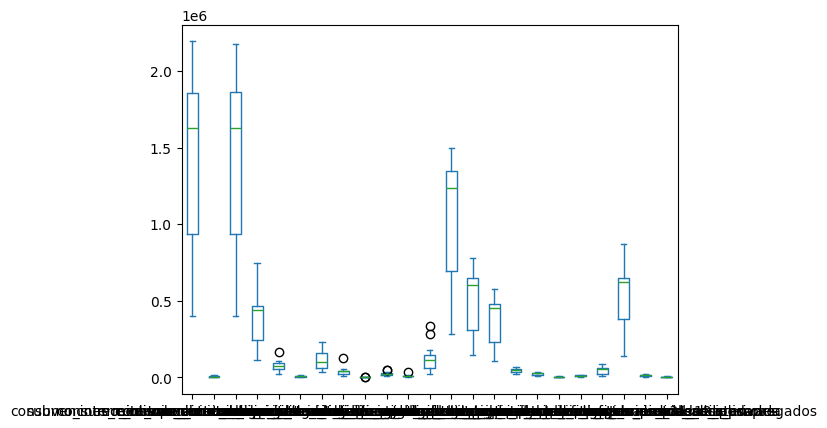

In [15]:
agencias_de_noticias_df[colunas_numericas].plot(kind='box')
plt.show()

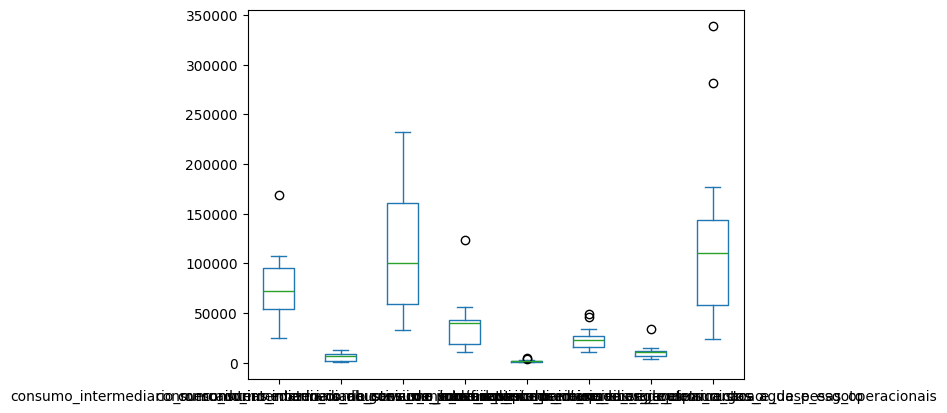

In [16]:
agencias_de_noticias_df.iloc[:,6:14].plot(kind='box')
plt.show()

In [17]:
def replace_outliers_by_median(df, column_index):
    """
Função criada para substituir outliers de um pequeno conjunto de dados pela mediana. 
Obs: Usar apenas em colunas que você sabe, via boxplot, que possuam outliers.
    """
    # Calcular os quartis e o intervalo interquartil (IQR)
    Q1 = df.iloc[:, column_index].quantile(0.25)
    Q3 = df.iloc[:, column_index].quantile(0.75)
    IQR = Q3 - Q1

    # Definir os limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calcular a mediana
    median = df.iloc[:, column_index].median()

    # Substituir os outliers pela mediana
    df.loc[df.iloc[:, column_index] < lower_bound, df.columns[column_index]] = median
    df.loc[df.iloc[:, column_index] > upper_bound, df.columns[column_index]] = median

In [18]:
replace_outliers_by_median(agencias_de_noticias_df, 6)
replace_outliers_by_median(agencias_de_noticias_df , 9)
replace_outliers_by_median(agencias_de_noticias_df, 10)
replace_outliers_by_median(agencias_de_noticias_df, 11)
replace_outliers_by_median(agencias_de_noticias_df, 12)
replace_outliers_by_median(agencias_de_noticias_df, 13)

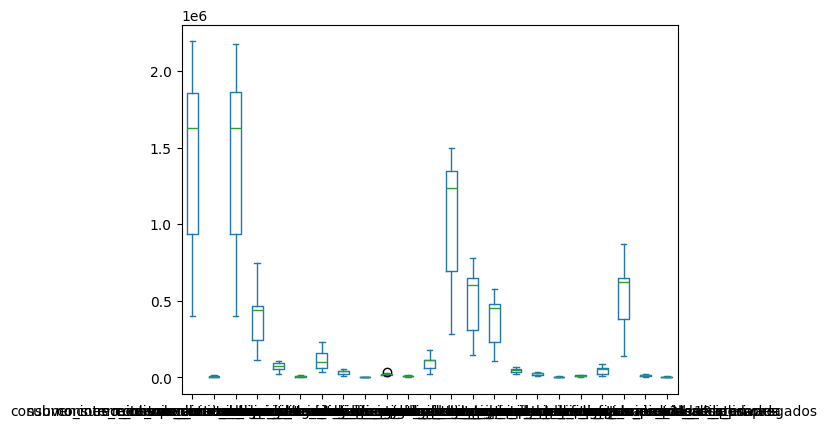

In [19]:
agencias_de_noticias_df[colunas_numericas].plot(kind='box')
plt.show()

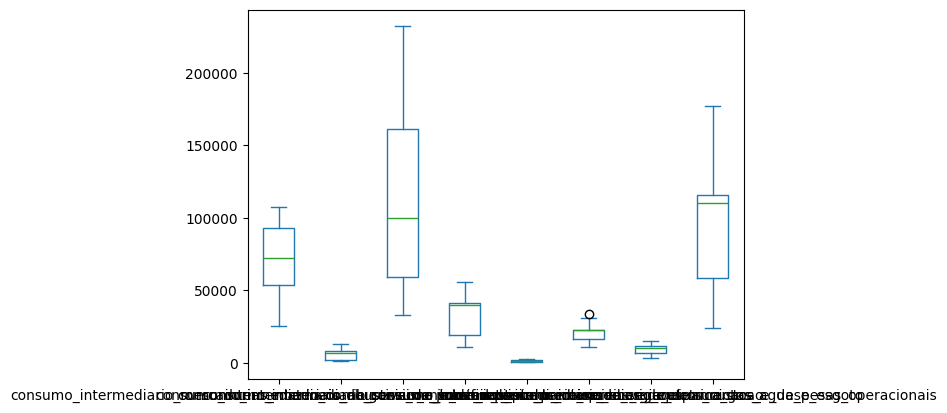

In [20]:
agencias_de_noticias_df.iloc[:,6:14].plot(kind='box')
plt.show()

In [21]:
agencias_de_noticias_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,397811.00,NaN,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,105360.00,20413.00,7912.00,730.00,2180.00,9103.00,NaN,137424.00,5202.00,1430.00
1,2008,421744.00,232,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,107650.00,20133.00,8063.00,926.00,2830.00,10195.00,2,139649.00,5109.00,1347.00
2,2009,542945.00,NaN,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,149352.00,23419.00,11092.00,2090.00,4694.00,14007.00,13,181530.00,7477.00,1653.00
3,2010,686085.00,580,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,200514.00,27394.00,12433.00,649.00,7623.00,15816.00,11,214166.00,9813.00,2581.00
4,2011,1189552.00,4766,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,267346.00,38409.00,16381.00,1741.00,5920.00,26819.00,NaN,552752.00,13913.00,3511.00


In [22]:
agencias_de_noticias_df["custo_das_mercadorias_revendidas_mil_reais"] = pd.to_numeric(agencias_de_noticias_df["custo_das_mercadorias_revendidas_mil_reais"])
agencias_de_noticias_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,397811.00,NaN,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,105360.00,20413.00,7912.00,730.00,2180.00,9103.00,NaN,137424.00,5202.00,1430.00
1,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,107650.00,20133.00,8063.00,926.00,2830.00,10195.00,2,139649.00,5109.00,1347.00
2,2009,542945.00,NaN,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,149352.00,23419.00,11092.00,2090.00,4694.00,14007.00,13,181530.00,7477.00,1653.00
3,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,200514.00,27394.00,12433.00,649.00,7623.00,15816.00,11,214166.00,9813.00,2581.00
4,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,267346.00,38409.00,16381.00,1741.00,5920.00,26819.00,NaN,552752.00,13913.00,3511.00


In [23]:
agencias_de_noticias_df["pis_sobre_folha_de_pagamento"] = pd.to_numeric(agencias_de_noticias_df["pis_sobre_folha_de_pagamento"])
agencias_de_noticias_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,397811.00,NaN,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,105360.00,20413.00,7912.00,730.00,2180.00,9103.00,NaN,137424.00,5202.00,1430.00
1,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,107650.00,20133.00,8063.00,926.00,2830.00,10195.00,2.00,139649.00,5109.00,1347.00
2,2009,542945.00,NaN,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,149352.00,23419.00,11092.00,2090.00,4694.00,14007.00,13.00,181530.00,7477.00,1653.00
3,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,200514.00,27394.00,12433.00,649.00,7623.00,15816.00,11.00,214166.00,9813.00,2581.00
4,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,267346.00,38409.00,16381.00,1741.00,5920.00,26819.00,NaN,552752.00,13913.00,3511.00


In [24]:
agencias_de_noticias_df["custo_das_mercadorias_revendidas_mil_reais"].isna().value_counts()

custo_das_mercadorias_revendidas_mil_reais
False    13
True      2
Name: count, dtype: int64

In [25]:
agencias_de_noticias_df["pis_sobre_folha_de_pagamento"].isna().value_counts()

pis_sobre_folha_de_pagamento
False    11
True      4
Name: count, dtype: int64

In [26]:
agencias_de_noticias_df["custo_das_mercadorias_revendidas_mil_reais"].loc[agencias_de_noticias_df["custo_das_mercadorias_revendidas_mil_reais"].isna()] = agencias_de_noticias_df["custo_das_mercadorias_revendidas_mil_reais"].median()
agencias_de_noticias_df.head()

C:\Users\everc\AppData\Local\Temp\ipykernel_11216\1972755064.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  agencias_de_noticias_df["custo_das_mercadorias_revendidas_mil_reais"].loc[agencias_de_noticias_df["custo_das_mercadorias_revendi

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,397811.00,5593.00,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,105360.00,20413.00,7912.00,730.00,2180.00,9103.00,NaN,137424.00,5202.00,1430.00
1,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,107650.00,20133.00,8063.00,926.00,2830.00,10195.00,2.00,139649.00,5109.00,1347.00
2,2009,542945.00,5593.00,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,149352.00,23419.00,11092.00,2090.00,4694.00,14007.00,13.00,181530.00,7477.00,1653.00
3,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,200514.00,27394.00,12433.00,649.00,7623.00,15816.00,11.00,214166.00,9813.00,2581.00
4,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,267346.00,38409.00,16381.00,1741.00,5920.00,26819.00,NaN,552752.00,13913.00,3511.00


In [27]:
agencias_de_noticias_df["pis_sobre_folha_de_pagamento"].loc[agencias_de_noticias_df["pis_sobre_folha_de_pagamento"].isna()] = agencias_de_noticias_df["pis_sobre_folha_de_pagamento"].median()
agencias_de_noticias_df.head()

C:\Users\everc\AppData\Local\Temp\ipykernel_11216\3596596416.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  agencias_de_noticias_df["pis_sobre_folha_de_pagamento"].loc[agencias_de_noticias_df["pis_sobre_folha_de_pagamento"].isna()] = ag

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,397811.00,5593.00,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,105360.00,20413.00,7912.00,730.00,2180.00,9103.00,13.00,137424.00,5202.00,1430.00
1,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,107650.00,20133.00,8063.00,926.00,2830.00,10195.00,2.00,139649.00,5109.00,1347.00
2,2009,542945.00,5593.00,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,149352.00,23419.00,11092.00,2090.00,4694.00,14007.00,13.00,181530.00,7477.00,1653.00
3,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,200514.00,27394.00,12433.00,649.00,7623.00,15816.00,11.00,214166.00,9813.00,2581.00
4,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,267346.00,38409.00,16381.00,1741.00,5920.00,26819.00,13.00,552752.00,13913.00,3511.00


In [28]:
agencias_de_noticias_df[agencias_de_noticias_df["pis_sobre_folha_de_pagamento"].isna()] = agencias_de_noticias_df["pis_sobre_folha_de_pagamento"].median()
agencias_de_noticias_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,397811.00,5593.00,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,105360.00,20413.00,7912.00,730.00,2180.00,9103.00,13.00,137424.00,5202.00,1430.00
1,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,107650.00,20133.00,8063.00,926.00,2830.00,10195.00,2.00,139649.00,5109.00,1347.00
2,2009,542945.00,5593.00,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,149352.00,23419.00,11092.00,2090.00,4694.00,14007.00,13.00,181530.00,7477.00,1653.00
3,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,200514.00,27394.00,12433.00,649.00,7623.00,15816.00,11.00,214166.00,9813.00,2581.00
4,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,267346.00,38409.00,16381.00,1741.00,5920.00,26819.00,13.00,552752.00,13913.00,3511.00


In [29]:
# Tratamento concluído
agencias_de_noticias_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     int32  
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     float64
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

In [30]:
agencias_de_noticias_df["setor"] = "agencia_noticias"
agencias_de_noticias_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades,setor
0,2007,397811.00,5593.00,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,20413.00,7912.00,730.00,2180.00,9103.00,13.00,137424.00,5202.00,1430.00,agencia_noticias
1,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,20133.00,8063.00,926.00,2830.00,10195.00,2.00,139649.00,5109.00,1347.00,agencia_noticias
2,2009,542945.00,5593.00,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,23419.00,11092.00,2090.00,4694.00,14007.00,13.00,181530.00,7477.00,1653.00,agencia_noticias
3,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,27394.00,12433.00,649.00,7623.00,15816.00,11.00,214166.00,9813.00,2581.00,agencia_noticias
4,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,38409.00,16381.00,1741.00,5920.00,26819.00,13.00,552752.00,13913.00,3511.00,agencia_noticias


# Edição e Edição Integrada a impressão

In [31]:
edicao_df = pd.read_csv("datasets/edicao_e_edicao_integrada_a_impressao.csv", skiprows=4)
edicao_df.head()

,Unnamed: 0,Receita operacional líquida (Mil Reais),Coeficiente de variação - Receita operacional líquida (%),Custo das mercadorias revendidas (Mil Reais),Coeficiente de variação - Custo das mercadorias revendidas (%),Subvenções e outras receitas operacionais (Mil Reais),Coeficiente de variação - Subvenções e outras receitas operacionais (%),Valor bruto da produção (Mil Reais),Coeficiente de variação - Valor bruto da produção (%),Consumo intermediário - total (Mil Reais),...,Gastos com pessoal - benefícios concedidos aos empregados (Mil Reais),Coeficiente de variação - Gastos com pessoal - benefícios concedidos aos empregados (%),PIS sobre folha de pagamento (Mil Reais),Coeficiente de variação - PIS sobre folha de pagamento (%),Excedente operacional bruto (Mil Reais),Coeficiente de variação - Excedente operacional bruto (%),Pessoal ocupado em 31/12 (Pessoas),Coeficiente de variação - Pessoal ocupado em 31/12 (%),Número de empresas (Unidades),Coeficiente de variação - Número de empresas (%)
0,2007,15228480.00,A,71152.00,B,87932.00,B,15245260.00,A,8668367.00,...,326131.00,A,...,Z,2803274.00,B,112706.00,A,10233.00,B
1,2008,16562731.00,A,167024.00,B,196216.00,A,16591923.00,A,8951911.00,...,345016.00,A,77,C,3403749.00,B,111282.00,A,11011.00,B
2,2009,17318248.00,A,96897.00,B,315462.00,A,17536813.00,A,9494028.00,...,341137.00,A,205,B,3734148.00,A,114050.00,A,9975.00,B
3,2010,20195231.00,A,134261.00,C,330621.00,A,20391592.00,A,11421355.00,...,407425.00,A,360,E,3839929.00,A,126019.00,A,12173.00,A
4,2011,20614565.00,A,174004.00,B,254507.00,A,20695068.00,A,11079024.00,...,451108.00,A,431,B,4145591.00,B,125890.00,A,13029.00,B


In [32]:
edicao_df.columns = lista_normalizada
edicao_df = edicao_df[colunas_selecionadas]
edicao_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,15228480.00,71152.00,87932.00,15245260.00,8668367.00,2727637.00,50825.00,2378223.00,231255.00,...,2624447.00,521236.00,201977.00,21421.00,78406.00,326131.00,...,2803274.00,112706.00,10233.00
1,2008,16562731.00,167024.00,196216.00,16591923.00,8951911.00,2434551.00,42305.00,2049156.00,267362.00,...,2949291.00,593779.00,216187.00,28839.00,103076.00,345016.00,77,3403749.00,111282.00,11011.00
2,2009,17318248.00,96897.00,315462.00,17536813.00,9494028.00,618812.00,43366.00,2141185.00,292607.00,...,3023597.00,588462.00,218814.00,29637.00,106784.00,341137.00,205,3734148.00,114050.00,9975.00
3,2010,20195231.00,134261.00,330621.00,20391592.00,11421355.00,429741.00,53694.00,2305739.00,326259.00,...,3561855.00,721234.00,264230.00,43232.00,131974.00,407425.00,360,3839929.00,126019.00,12173.00
4,2011,20614565.00,174004.00,254507.00,20695068.00,11079024.00,413615.00,71086.00,2275081.00,373641.00,...,3790537.00,749757.00,283651.00,34106.00,160862.00,451108.00,431,4145591.00,125890.00,13029.00


In [33]:
edicao_df = edicao_df.iloc[:-1, :]
edicao_df.tail()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
10,2017,16776945.00,221251.00,318449.00,16874143.00,8917158.00,829058.00,45067.00,1977385.00,350906.00,...,3774018.00,420723.00,274483.00,25553.00,211548.00,483998.00,213,2766449.00,84263.00,10496.00
11,2018,16756590.00,484630.00,315968.00,16587928.00,8783725.00,752821.00,50532.00,1990438.00,364740.00,...,3706962.00,460158.00,272822.00,18975.00,267964.00,521788.00,4728,2550803.00,79753.00,10382.00
12,2019,16955229.00,333899.00,272253.00,16893583.00,8796078.00,666521.00,55344.00,1912423.00,268940.00,...,3288445.00,379913.00,250124.00,18411.00,214873.00,473171.00,104,3472463.00,76169.00,10719.00
13,2020,15192355.00,405974.00,383668.00,15170049.00,7669090.00,695733.00,27064.00,1882890.00,280552.00,...,3001848.00,399990.00,227905.00,15962.00,247356.00,484319.00,12,3123566.00,60099.00,7247.00
14,2021,16544503.00,524743.00,231425.00,16251185.00,8904022.00,768399.00,45551.00,2136003.00,225935.00,...,3106444.00,386795.00,219111.00,17092.00,204961.00,433341.00,46,2979374.00,59783.00,8884.00


In [34]:
edicao_df["ano"] = pd.to_numeric(edicao_df["ano"])
edicao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     int64  
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     float64
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

In [35]:
edicao_df["pis_sobre_folha_de_pagamento"].isna().value_counts()

pis_sobre_folha_de_pagamento
False    15
Name: count, dtype: int64

In [36]:
edicao_df["pis_sobre_folha_de_pagamento"]

0      ...
1       77
2      205
3      360
4      431
5      103
6       85
7       65
8       91
9      471
10     213
11    4728
12     104
13      12
14      46
Name: pis_sobre_folha_de_pagamento, dtype: object

In [37]:
edicao_df["pis_sobre_folha_de_pagamento"].loc[edicao_df["pis_sobre_folha_de_pagamento"].isin(["-", "..."])] = np.nan
edicao_df["pis_sobre_folha_de_pagamento"].isna().value_counts()

C:\Users\everc\AppData\Local\Temp\ipykernel_11216\1241482019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edicao_df["pis_sobre_folha_de_pagamento"].loc[edicao_df["pis_sobre_folha_de_pagamento"].isin(["-", "..."])] = np.nan


pis_sobre_folha_de_pagamento
False    14
True      1
Name: count, dtype: int64

In [38]:
edicao_df["pis_sobre_folha_de_pagamento"] = pd.to_numeric(edicao_df["pis_sobre_folha_de_pagamento"])
edicao_df["pis_sobre_folha_de_pagamento"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15 entries, 0 to 14
Series name: pis_sobre_folha_de_pagamento
Non-Null Count  Dtype  
--------------  -----  
14 non-null     float64
dtypes: float64(1)
memory usage: 252.0 bytes


In [39]:
edicao_df["pis_sobre_folha_de_pagamento"].loc[edicao_df["pis_sobre_folha_de_pagamento"].isna()] = edicao_df["pis_sobre_folha_de_pagamento"].median()
edicao_df["pis_sobre_folha_de_pagamento"].isna().value_counts()

C:\Users\everc\AppData\Local\Temp\ipykernel_11216\2254821349.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edicao_df["pis_sobre_folha_de_pagamento"].loc[edicao_df["pis_sobre_folha_de_pagamento"].isna()] = edicao_df["pis_sobre_folha_de_

pis_sobre_folha_de_pagamento
False    15
Name: count, dtype: int64

In [40]:
edicao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     int64  
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     float64
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

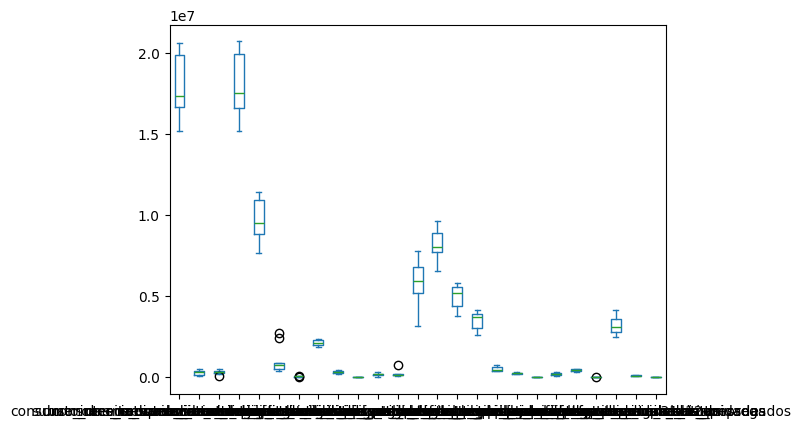

In [41]:
edicao_df[colunas_numericas].plot(kind='box')
plt.show()

In [42]:
replace_outliers_by_median(edicao_df, 2)
replace_outliers_by_median(edicao_df, 5)
replace_outliers_by_median(edicao_df, 6)
replace_outliers_by_median(edicao_df, 11)
replace_outliers_by_median(edicao_df, 21)

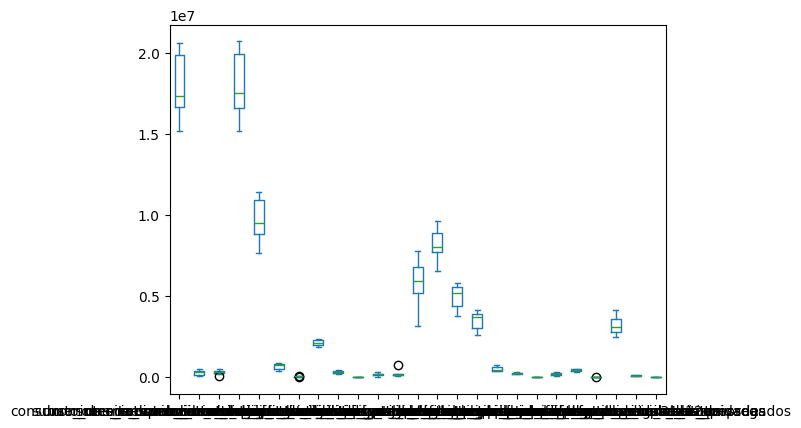

In [43]:
edicao_df[colunas_numericas].plot(kind='box')
plt.show()

In [44]:
edicao_df.isnull().any()

ano                                                                           False
receita_operacional_liquida                                                   False
custo_das_mercadorias_revendidas_mil_reais                                    False
subvencoes_e_outras_receitas_operacionais_mil_reais                           False
valor_bruto_da_producao                                                       False
consumo_intermediario_total                                                   False
consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao         False
consumo_intermediario_combustiveis_e_lubrificantes                            False
consumo_intermediario_servicos_prestados_por_terceiros                        False
consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos    False
consumo_intermediario_premios_de_seguros                                      False
consumo_intermediario_servicos_de_comunicacao                               

In [45]:
edicao_df["setor"] = "edicao"
edicao_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades,setor
0,2007,15228480.00,71152.00,87932.00,15245260.00,8668367.00,752821.00,50825.00,2378223.00,231255.00,...,521236.00,201977.00,21421.00,78406.00,326131.00,103.50,2803274.00,112706.00,10233.00,edicao
1,2008,16562731.00,167024.00,196216.00,16591923.00,8951911.00,752821.00,42305.00,2049156.00,267362.00,...,593779.00,216187.00,28839.00,103076.00,345016.00,77.00,3403749.00,111282.00,11011.00,edicao
2,2009,17318248.00,96897.00,315462.00,17536813.00,9494028.00,618812.00,43366.00,2141185.00,292607.00,...,588462.00,218814.00,29637.00,106784.00,341137.00,205.00,3734148.00,114050.00,9975.00,edicao
3,2010,20195231.00,134261.00,330621.00,20391592.00,11421355.00,429741.00,53694.00,2305739.00,326259.00,...,721234.00,264230.00,43232.00,131974.00,407425.00,360.00,3839929.00,126019.00,12173.00,edicao
4,2011,20614565.00,174004.00,254507.00,20695068.00,11079024.00,413615.00,71086.00,2275081.00,373641.00,...,749757.00,283651.00,34106.00,160862.00,451108.00,431.00,4145591.00,125890.00,13029.00,edicao


# Serviços Audiovisuais

In [46]:
serv_audvis_df = pd.read_csv("datasets/servicos_audiovisuais.csv", skiprows=4)
serv_audvis_df.columns = lista_normalizada
serv_audvis_df = serv_audvis_df[colunas_selecionadas]
serv_audvis_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,17440214.00,33745.00,651137.00,18057605.00,9522652.00,1263077.00,54040.00,2442684.00,525400.00,...,2640458.00,590772.00,199986.00,198097.00,105805.00,349801.00,...,4450033.00,101415.00,8554.00
1,2008,19893756.00,18819.00,398276.00,20273213.00,10567851.00,1108821.00,64558.00,2615211.00,549905.00,...,3096128.00,713636.00,237298.00,78382.00,95407.00,384556.00,53,5099904.00,104175.00,8330.00
2,2009,21916776.00,20732.00,958203.00,22854246.00,11992056.00,1150170.00,58847.00,3132059.00,574990.00,...,3511899.00,790388.00,268153.00,29585.00,117311.00,454640.00,92,5690123.00,110164.00,9158.00
3,2010,27272384.00,73867.00,710557.00,27909074.00,14771622.00,1256761.00,63065.00,3810701.00,727025.00,...,4203031.00,955853.00,311680.00,48649.00,136924.00,534735.00,191,6946390.00,117390.00,11054.00
4,2011,29961080.00,20580.00,868817.00,30809317.00,15892882.00,1302942.00,70037.00,4503073.00,829123.00,...,4906044.00,1061080.00,357367.00,59943.00,181126.00,600095.00,87,7750692.00,122303.00,11784.00


In [47]:
serv_audvis_df = serv_audvis_df.iloc[:-1, :]
serv_audvis_df.tail()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
10,2017,40880810.00,63163.00,1218572.00,42036219.00,23954159.00,2018261.00,80765.00,5545508.00,1224596.00,...,7156086.00,730987.00,527269.00,34032.00,423362.00,1079728.00,66,8130532.00,126836.00,15591.00
11,2018,41534448.00,42134.00,1084217.00,42576531.00,25306241.00,2108468.00,86028.00,5849759.00,1148025.00,...,7410024.00,726284.00,544582.00,129046.00,496477.00,1143502.00,2066,6818311.00,127211.00,15363.00
12,2019,41781559.00,89295.00,1363965.00,43056229.00,25458631.00,2448531.00,75283.00,5475834.00,1237721.00,...,7633148.00,740874.00,547017.00,145221.00,524627.00,1200054.00,185,6806471.00,127067.00,15531.00
13,2020,35996980.00,24307.00,1061513.00,37034186.00,21509263.00,1719865.00,64835.00,5817956.00,1020725.00,...,7233259.00,641054.00,515514.00,132711.00,537234.00,1137539.00,1688,5325925.00,111386.00,14452.00
14,2021,44472117.00,85123.00,1077980.00,45464974.00,27367491.00,2406440.00,91065.00,6640329.00,1150103.00,...,7901910.00,728143.00,522770.00,38923.00,584590.00,1211855.00,293,7109000.00,117794.00,17183.00


In [48]:
serv_audvis_df.isnull().any()

ano                                                                           False
receita_operacional_liquida                                                   False
custo_das_mercadorias_revendidas_mil_reais                                    False
subvencoes_e_outras_receitas_operacionais_mil_reais                           False
valor_bruto_da_producao                                                       False
consumo_intermediario_total                                                   False
consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao         False
consumo_intermediario_combustiveis_e_lubrificantes                            False
consumo_intermediario_servicos_prestados_por_terceiros                        False
consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos    False
consumo_intermediario_premios_de_seguros                                      False
consumo_intermediario_servicos_de_comunicacao                               

In [49]:
serv_audvis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     object 
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     float64
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

In [50]:
serv_audvis_df["ano"] = pd.to_numeric(serv_audvis_df["ano"])
serv_audvis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     int64  
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     float64
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

In [51]:
serv_audvis_df["pis_sobre_folha_de_pagamento"]

0      ...
1       53
2       92
3      191
4       87
5      105
6      128
7      118
8      212
9      113
10      66
11    2066
12     185
13    1688
14     293
Name: pis_sobre_folha_de_pagamento, dtype: object

In [52]:
serv_audvis_df["pis_sobre_folha_de_pagamento"].loc[serv_audvis_df["pis_sobre_folha_de_pagamento"].isin(["-", "..."])] = np.nan
serv_audvis_df["pis_sobre_folha_de_pagamento"] = pd.to_numeric(serv_audvis_df["pis_sobre_folha_de_pagamento"])
serv_audvis_df["pis_sobre_folha_de_pagamento"].loc[serv_audvis_df["pis_sobre_folha_de_pagamento"].isna()] = serv_audvis_df["pis_sobre_folha_de_pagamento"].median()
serv_audvis_df.isnull().any()

C:\Users\everc\AppData\Local\Temp\ipykernel_11216\3059089771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serv_audvis_df["pis_sobre_folha_de_pagamento"].loc[serv_audvis_df["pis_sobre_folha_de_pagamento"].isin(["-", "..."])] = np.nan
C:\Users\everc\AppData\Local\Temp\ipykernel_11216\3059089771.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexe

ano                                                                           False
receita_operacional_liquida                                                   False
custo_das_mercadorias_revendidas_mil_reais                                    False
subvencoes_e_outras_receitas_operacionais_mil_reais                           False
valor_bruto_da_producao                                                       False
consumo_intermediario_total                                                   False
consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao         False
consumo_intermediario_combustiveis_e_lubrificantes                            False
consumo_intermediario_servicos_prestados_por_terceiros                        False
consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos    False
consumo_intermediario_premios_de_seguros                                      False
consumo_intermediario_servicos_de_comunicacao                               

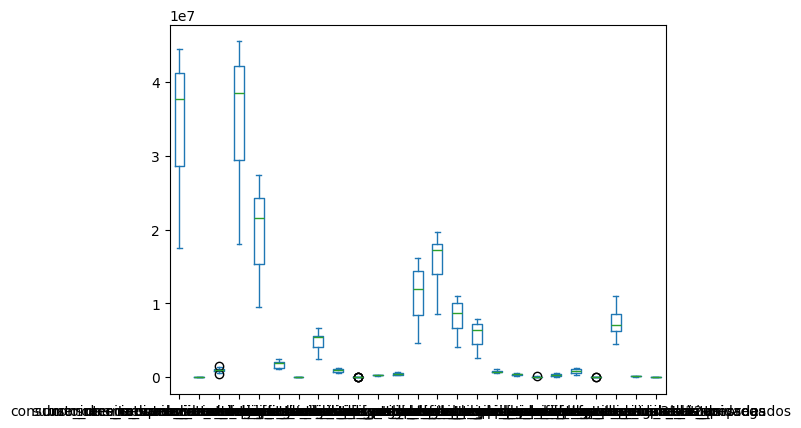

In [53]:
serv_audvis_df[colunas_numericas].plot(kind="box")
plt.show()

In [54]:
replace_outliers_by_median(serv_audvis_df, 2)
replace_outliers_by_median(serv_audvis_df, 9)
replace_outliers_by_median(serv_audvis_df, 18)
replace_outliers_by_median(serv_audvis_df, 21)

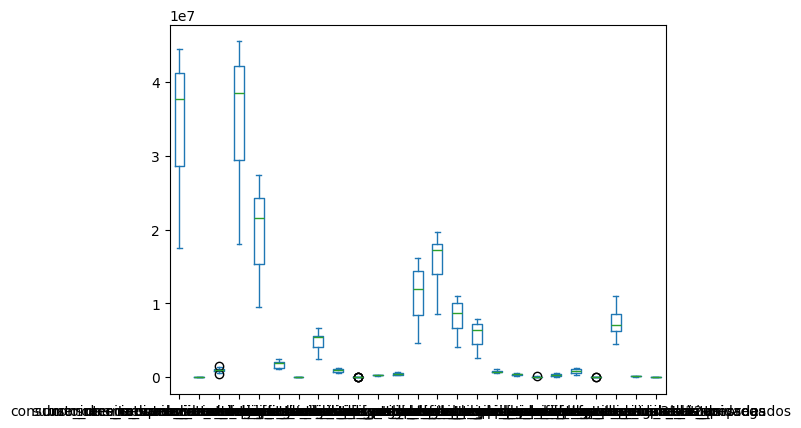

In [55]:
serv_audvis_df[colunas_numericas].plot(kind="box")
plt.show()

In [56]:
serv_audvis_df.isnull().any()

ano                                                                           False
receita_operacional_liquida                                                   False
custo_das_mercadorias_revendidas_mil_reais                                    False
subvencoes_e_outras_receitas_operacionais_mil_reais                           False
valor_bruto_da_producao                                                       False
consumo_intermediario_total                                                   False
consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao         False
consumo_intermediario_combustiveis_e_lubrificantes                            False
consumo_intermediario_servicos_prestados_por_terceiros                        False
consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos    False
consumo_intermediario_premios_de_seguros                                      False
consumo_intermediario_servicos_de_comunicacao                               

In [57]:
serv_audvis_df["setor"] = "serv_audvis"
serv_audvis_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades,setor
0,2007,17440214.00,33745.00,651137.00,18057605.00,9522652.00,1263077.00,54040.00,2442684.00,525400.00,...,590772.00,199986.00,198097.00,105805.00,349801.00,123.00,4450033.00,101415.00,8554.00,serv_audvis
1,2008,19893756.00,18819.00,398276.00,20273213.00,10567851.00,1108821.00,64558.00,2615211.00,549905.00,...,713636.00,237298.00,78382.00,95407.00,384556.00,53.00,5099904.00,104175.00,8330.00,serv_audvis
2,2009,21916776.00,20732.00,958203.00,22854246.00,11992056.00,1150170.00,58847.00,3132059.00,574990.00,...,790388.00,268153.00,29585.00,117311.00,454640.00,92.00,5690123.00,110164.00,9158.00,serv_audvis
3,2010,27272384.00,73867.00,710557.00,27909074.00,14771622.00,1256761.00,63065.00,3810701.00,727025.00,...,955853.00,311680.00,48649.00,136924.00,534735.00,191.00,6946390.00,117390.00,11054.00,serv_audvis
4,2011,29961080.00,20580.00,868817.00,30809317.00,15892882.00,1302942.00,70037.00,4503073.00,829123.00,...,1061080.00,357367.00,59943.00,181126.00,600095.00,87.00,7750692.00,122303.00,11784.00,serv_audvis


# Tecnologia da Informação

In [58]:
ti_df = pd.read_csv("datasets/tecnologia_da_informacao.csv", skiprows=4)
ti_df.columns = lista_normalizada
ti_df = ti_df[colunas_selecionadas]
ti_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,2007,36753465.00,2003972.00,895726.00,35645220.00,14156216.00,3055520.00,58538.00,5619560.00,905992.00,...,8805851.00,1882980.00,652860.00,117681.00,166541.00,1220041.00,...,8643050.00,327069.00,44145.00
1,2008,41000228.00,1999679.00,947987.00,39948536.00,16390485.00,4113263.00,75523.00,6497899.00,986571.00,...,10426576.00,2252494.00,768389.00,143567.00,217843.00,1479654.00,452,8269077.00,339093.00,46250.00
2,2009,47271883.00,2483793.00,1241866.00,46029956.00,17567994.00,3531366.00,85462.00,7391721.00,1133981.00,...,12644280.00,2642123.00,896206.00,186974.00,289439.00,1980862.00,728,9821351.00,368938.00,48661.00
3,2010,55146373.00,1911425.00,1450517.00,54685465.00,19011046.00,3630159.00,94495.00,8075905.00,1164325.00,...,16282716.00,2920554.00,1078294.00,174395.00,281251.00,2059897.00,2100,12875212.00,400458.00,55243.00
4,2011,63965471.00,2535441.00,2285096.00,63715126.00,21689847.00,4585729.00,118153.00,8453231.00,1339214.00,...,18037054.00,3349593.00,1177182.00,267158.00,441353.00,2744100.00,5633,16003206.00,436607.00,54891.00


In [59]:
ti_df = ti_df.iloc[:-1, :]
ti_df.tail()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
10,2017,121442484.00,3361280.00,2260424.00,120341628.00,43173199.00,7016740.00,211505.00,15327008.00,2388820.00,...,33738931.00,4167022.00,2531797.00,466188.00,1143659.00,6051923.00,1258,29067651.00,551281.00,64179.00
11,2018,140452385.00,3836954.00,2304792.00,138920223.00,51978356.00,9990483.00,155315.00,18188257.00,3268083.00,...,36534255.00,4821070.00,2652490.00,397303.00,1072490.00,6677699.00,1655,34784904.00,574848.00,65246.00
12,2019,153436368.00,2945264.00,2301030.00,152792134.00,60711121.00,13196048.00,238566.00,21143952.00,2736142.00,...,38082592.00,5450729.00,2877005.00,434715.00,1107192.00,7214640.00,4779,36909360.00,611950.00,71437.00
13,2020,169938114.00,3559763.00,3270371.00,169648722.00,68849354.00,16042581.00,358630.00,24221074.00,2992913.00,...,42962099.00,5602437.00,3139578.00,520162.00,1203674.00,7476985.00,14259,39880175.00,623183.00,74329.00
14,2021,214207142.00,3436750.00,4350913.00,215121305.00,97193824.00,20653888.00,195592.00,33020141.00,3349221.00,...,52667294.00,7206584.00,3786478.00,557416.00,1103815.00,9513061.00,1814,43091019.00,731817.00,77463.00


In [60]:
ti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     object 
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     float64
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

In [61]:
ti_df["ano"] = pd.to_numeric(ti_df["ano"])
ti_df["pis_sobre_folha_de_pagamento"].loc[ti_df["pis_sobre_folha_de_pagamento"].isin(["-", "..."])] = np.nan
ti_df["pis_sobre_folha_de_pagamento"] = pd.to_numeric(ti_df["pis_sobre_folha_de_pagamento"])
ti_df["pis_sobre_folha_de_pagamento"].loc[ti_df["pis_sobre_folha_de_pagamento"].isna()] = ti_df["pis_sobre_folha_de_pagamento"].median()
ti_df.isnull().any()

C:\Users\everc\AppData\Local\Temp\ipykernel_11216\522633096.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ti_df["pis_sobre_folha_de_pagamento"].loc[ti_df["pis_sobre_folha_de_pagamento"].isin(["-", "..."])] = np.nan
C:\Users\everc\AppDa

ano                                                                           False
receita_operacional_liquida                                                   False
custo_das_mercadorias_revendidas_mil_reais                                    False
subvencoes_e_outras_receitas_operacionais_mil_reais                           False
valor_bruto_da_producao                                                       False
consumo_intermediario_total                                                   False
consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao         False
consumo_intermediario_combustiveis_e_lubrificantes                            False
consumo_intermediario_servicos_prestados_por_terceiros                        False
consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos    False
consumo_intermediario_premios_de_seguros                                      False
consumo_intermediario_servicos_de_comunicacao                               

In [62]:
ti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     int64  
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     float64
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

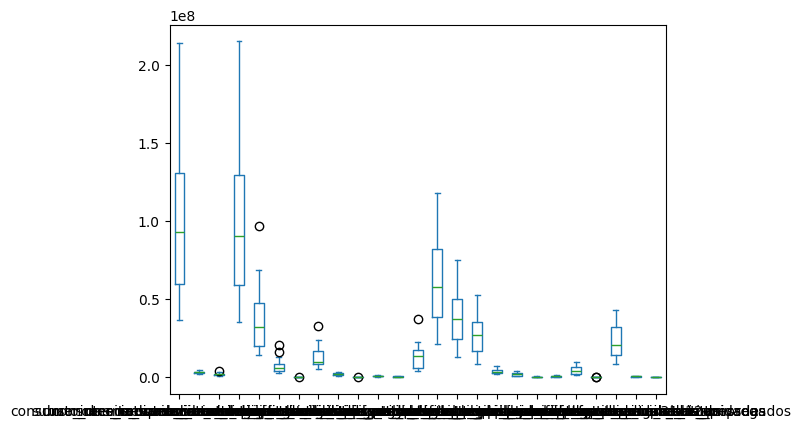

In [63]:
ti_df[colunas_numericas].plot(kind="box")
plt.show()

In [64]:
replace_outliers_by_median(ti_df, 2)
replace_outliers_by_median(ti_df, 4)
replace_outliers_by_median(ti_df, 5)
replace_outliers_by_median(ti_df, 6)
replace_outliers_by_median(ti_df, 7)
replace_outliers_by_median(ti_df, 9)
replace_outliers_by_median(ti_df, 12)
replace_outliers_by_median(ti_df, 21)

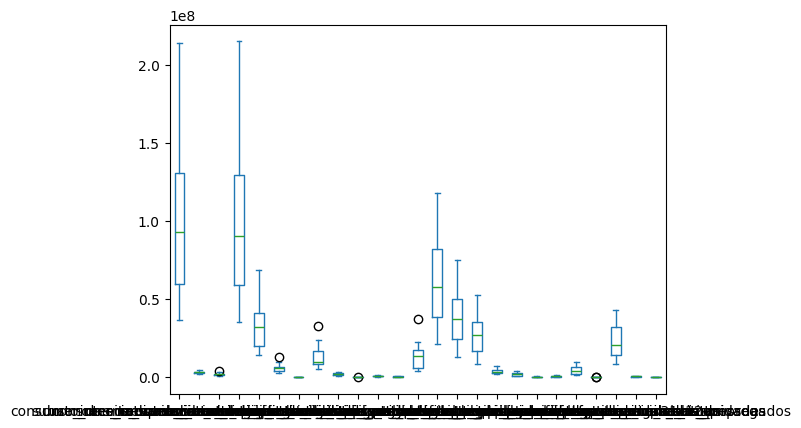

In [65]:
ti_df[colunas_numericas].plot(kind="box")
plt.show()

In [66]:
ti_df["setor"] = "ti"
ti_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades,setor
0,2007,36753465.00,2003972.00,895726.00,35645220.00,14156216.00,3055520.00,58538.00,5619560.00,905992.00,...,1882980.00,652860.00,117681.00,166541.00,1220041.00,1951.50,8643050.00,327069.00,44145.00,ti
1,2008,41000228.00,1999679.00,947987.00,39948536.00,16390485.00,4113263.00,75523.00,6497899.00,986571.00,...,2252494.00,768389.00,143567.00,217843.00,1479654.00,452.00,8269077.00,339093.00,46250.00,ti
2,2009,47271883.00,2483793.00,1241866.00,46029956.00,17567994.00,3531366.00,85462.00,7391721.00,1133981.00,...,2642123.00,896206.00,186974.00,289439.00,1980862.00,728.00,9821351.00,368938.00,48661.00,ti
3,2010,55146373.00,1911425.00,1450517.00,54685465.00,19011046.00,3630159.00,94495.00,8075905.00,1164325.00,...,2920554.00,1078294.00,174395.00,281251.00,2059897.00,2100.00,12875212.00,400458.00,55243.00,ti
4,2011,63965471.00,2535441.00,2285096.00,63715126.00,21689847.00,4585729.00,118153.00,8453231.00,1339214.00,...,3349593.00,1177182.00,267158.00,441353.00,2744100.00,5633.00,16003206.00,436607.00,54891.00,ti


# Telecomunicações

In [67]:
telecom_df = pd.read_csv("datasets/telecomunicacoes.csv", skiprows=4)
telecom_df.columns = lista_normalizada
telecom_df = telecom_df[colunas_selecionadas]
telecom_df = telecom_df.iloc[:-1, :]
telecom_df.tail()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
10,2017,160280090.00,4820898.00,6747509.00,162206701.00,85577309.00,7371378.00,202060.00,33181967.00,12110995.00,...,10290628.00,1857167.00,803729.00,158833.00,466728.00,2615076.00,32,60437199.00,203748.00,8950.00
11,2018,162779121.00,8549416.00,11459944.00,165689649.00,86467977.00,6131759.00,217636.00,32044857.00,16204784.00,...,10450574.00,1854162.00,832816.00,139773.00,679156.00,2784017.00,70,62481105.00,217786.00,9765.00
12,2019,163357424.00,7614585.00,11377872.00,167120711.00,77680906.00,8375374.00,252989.00,29058655.00,8553771.00,...,11226987.00,1904094.00,903096.00,120503.00,481770.00,3259731.00,246,71543379.00,232749.00,11119.00
13,2020,168547734.00,6066408.00,7279476.00,169760802.00,83070071.00,11985406.00,245251.00,29603397.00,10113706.00,...,11710761.00,1912445.00,903009.00,134019.00,552702.00,3280312.00,414,68197070.00,254809.00,12256.00
14,2021,179467345.00,6341067.00,8069589.00,181195867.00,94037717.00,11646497.00,386874.00,31812723.00,14245982.00,...,12802329.00,2166450.00,1001005.00,135647.00,536908.00,3294707.00,556,67220547.00,279051.00,14156.00


In [68]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ano                                                                         15 non-null     object 
 1   receita_operacional_liquida                                                 15 non-null     float64
 2   custo_das_mercadorias_revendidas_mil_reais                                  15 non-null     float64
 3   subvencoes_e_outras_receitas_operacionais_mil_reais                         15 non-null     float64
 4   valor_bruto_da_producao                                                     15 non-null     float64
 5   consumo_intermediario_total                                                 15 non-null     float64
 6   consumo_intermediario_mercadorias_materiais_de_consu

In [69]:
telecom_df["ano"] = pd.to_numeric(ti_df["ano"])
telecom_df["pis_sobre_folha_de_pagamento"].loc[telecom_df["pis_sobre_folha_de_pagamento"].isin(["-", "..."])] = np.nan
telecom_df["pis_sobre_folha_de_pagamento"] = pd.to_numeric(telecom_df["pis_sobre_folha_de_pagamento"])
telecom_df["pis_sobre_folha_de_pagamento"].loc[telecom_df["pis_sobre_folha_de_pagamento"].isna()] = telecom_df["pis_sobre_folha_de_pagamento"].median()
telecom_df.isnull().any()

C:\Users\everc\AppData\Local\Temp\ipykernel_11216\1304569698.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  telecom_df["pis_sobre_folha_de_pagamento"].loc[telecom_df["pis_sobre_folha_de_pagamento"].isin(["-", "..."])] = np.nan
C:\Users\

ano                                                                           False
receita_operacional_liquida                                                   False
custo_das_mercadorias_revendidas_mil_reais                                    False
subvencoes_e_outras_receitas_operacionais_mil_reais                           False
valor_bruto_da_producao                                                       False
consumo_intermediario_total                                                   False
consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao         False
consumo_intermediario_combustiveis_e_lubrificantes                            False
consumo_intermediario_servicos_prestados_por_terceiros                        False
consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos    False
consumo_intermediario_premios_de_seguros                                      False
consumo_intermediario_servicos_de_comunicacao                               

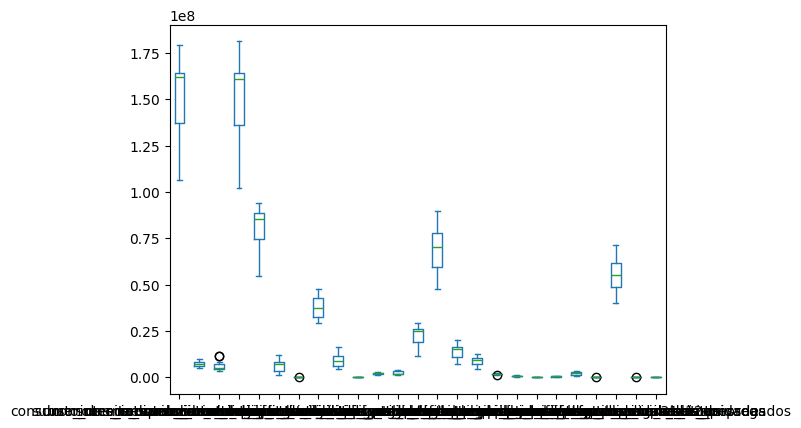

In [70]:
telecom_df[colunas_numericas].plot(kind="box")
plt.show()

In [71]:
replace_outliers_by_median(telecom_df, 2)
replace_outliers_by_median(telecom_df, 6)
replace_outliers_by_median(telecom_df, 16)
replace_outliers_by_median(telecom_df, 21)
replace_outliers_by_median(telecom_df, 23)

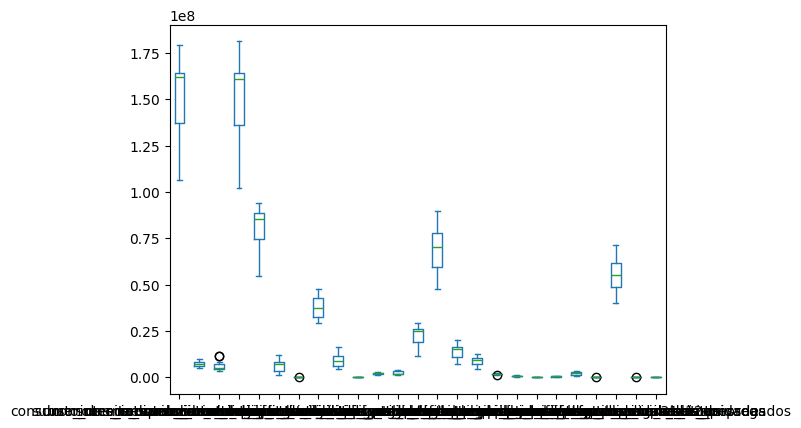

In [72]:
telecom_df[colunas_numericas].plot(kind="box")
plt.show()

In [73]:
telecom_df["setor"] = "telecom"
telecom_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades,setor
0,2007,106420779.00,7660227.00,3607977.00,102368529.00,54754338.00,1032583.00,106841.00,34826495.00,4662915.00,...,1030751.00,341415.00,120247.00,265305.00,830639.00,231.50,40278206.00,121540.00,3230.00,telecom
1,2008,120381912.00,9828150.00,3864854.00,114418616.00,63412444.00,1371462.00,96355.00,39567460.00,5420733.00,...,1192485.00,392035.00,140582.00,135642.00,1051266.00,217.00,42732340.00,136294.00,3319.00,telecom
2,2009,125021960.00,7643150.00,4392947.00,121771756.00,68897340.00,1789963.00,86419.00,41263454.00,6183911.00,...,1310834.00,421861.00,174792.00,349176.00,1123134.00,58.00,43989528.00,139349.00,3109.00,telecom
3,2010,131026343.00,5082318.00,3531721.00,129475747.00,71248077.00,2567574.00,111394.00,42264028.00,5816669.00,...,1473707.00,455833.00,139117.00,225409.00,1322125.00,1029.00,48139322.00,157573.00,3632.00,telecom
4,2011,143435374.00,6118279.00,5343530.00,142660625.00,81766636.00,3760740.00,184373.00,46715515.00,6091023.00,...,1672736.00,554156.00,166216.00,166449.00,1594034.00,430.00,49234501.00,191254.00,4351.00,telecom


In [74]:
si_br_df = pd.concat([agencias_de_noticias_df, edicao_df, serv_audvis_df, ti_df, telecom_df], axis=0)
si_br_df.shape

(75, 27)

In [75]:
si_br_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades,setor
0,2007,397811.00,5593.00,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,20413.00,7912.00,730.00,2180.00,9103.00,13.00,137424.00,5202.00,1430.00,agencia_noticias
1,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,20133.00,8063.00,926.00,2830.00,10195.00,2.00,139649.00,5109.00,1347.00,agencia_noticias
2,2009,542945.00,5593.00,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,23419.00,11092.00,2090.00,4694.00,14007.00,13.00,181530.00,7477.00,1653.00,agencia_noticias
3,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,27394.00,12433.00,649.00,7623.00,15816.00,11.00,214166.00,9813.00,2581.00,agencia_noticias
4,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,38409.00,16381.00,1741.00,5920.00,26819.00,13.00,552752.00,13913.00,3511.00,agencia_noticias


In [76]:
si_br_df["setor"].value_counts()

setor
agencia_noticias    15
edicao              15
serv_audvis         15
ti                  15
telecom             15
Name: count, dtype: int64

# Exportando o dataset final

In [77]:
si_br_df.to_csv("datasets/si_br.csv", index=False)